In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [59]:
df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts(normalize=True) 

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    1.0
2             Injury Collision                  1.0
Name: SEVERITYDESC, dtype: float64

In [60]:
df.groupby(['SEVERITYCODE']).WEATHER.value_counts()

SEVERITYCODE  WEATHER                 
1             Clear                       75295
              Raining                     21969
              Overcast                    18969
              Unknown                     14275
              Snowing                       736
              Other                         716
              Fog/Smog/Smoke                382
              Sleet/Hail/Freezing Rain       85
              Blowing Sand/Dirt              41
              Severe Crosswind               18
              Partly Cloudy                   2
2             Clear                       35840
              Raining                     11176
              Overcast                     8745
              Unknown                       816
              Fog/Smog/Smoke                187
              Snowing                       171
              Other                         116
              Sleet/Hail/Freezing Rain       28
              Blowing Sand/Dirt              15
 

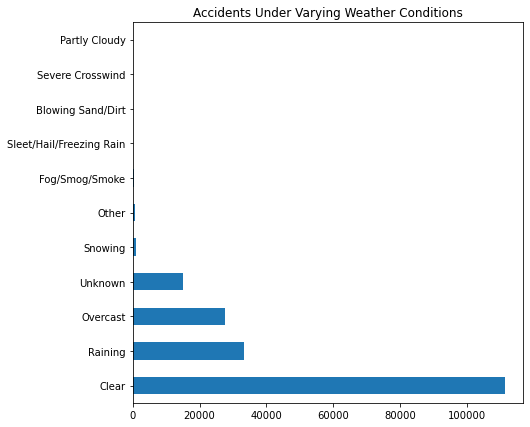

In [61]:
df['WEATHER'].value_counts().plot(kind='barh', figsize = (7, 7))
plt.title('Accidents Under Varying Weather Conditions')
plt.savefig('weather.jpg', bbox_inches = 'tight')

In [62]:
df['UNDERINFL'].value_counts()
df['UNDERINFL'].replace(to_replace = ['N', 'Y'], value = [0, 1], inplace = True)
df['UNDERINFL'] = pd.to_numeric(df['UNDERINFL'], errors='coerce')
df = df.dropna(subset=['UNDERINFL'])
df['UNDERINFL'] = df['UNDERINFL'].dropna()
df['UNDERINFL'] = df['UNDERINFL'].astype(int)

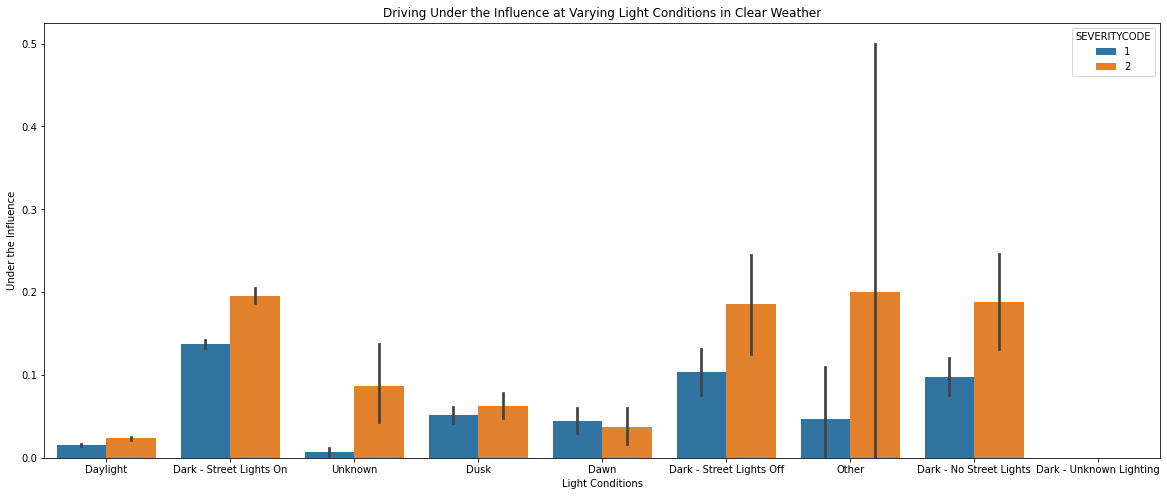

In [63]:
plt.figure(figsize=(20,8))
g = sns.barplot(x='LIGHTCOND', y='UNDERINFL', hue='SEVERITYCODE', data = df[df['WEATHER']=='Clear'])
#plt.show()
plt.title('Driving Under the Influence at Varying Light Conditions in Clear Weather')
plt.ylabel('Under the Influence')
plt.xlabel('Light Conditions')
plt.savefig('li_un_wet.jpg', bbox_inches = 'tight')

In [64]:
df['SPEEDING'] = df['SPEEDING'].fillna('N')
df['SPEEDING'].replace(to_replace = ['N', 'Y'], value = [0, 1], inplace = True)

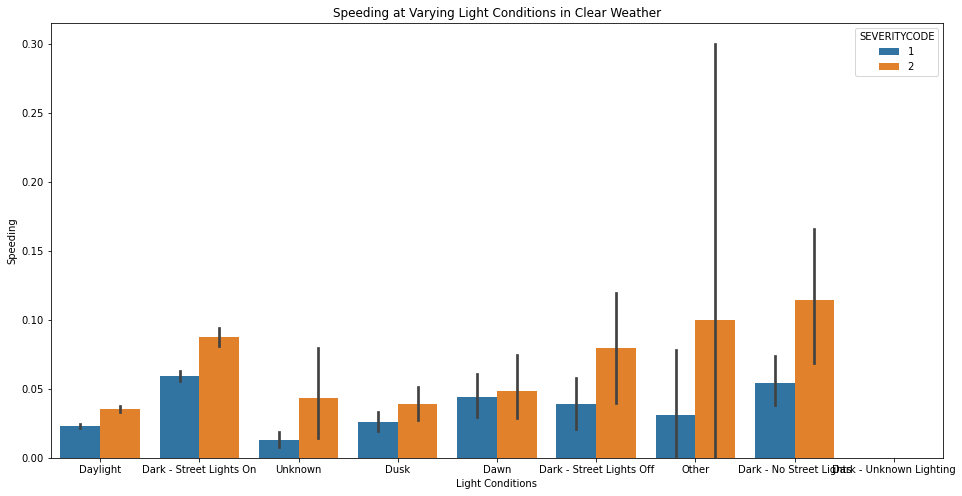

In [65]:
plt.figure(figsize=(16,8))
g = sns.barplot(x='LIGHTCOND', y='SPEEDING', hue='SEVERITYCODE', data = df[df['WEATHER']=='Clear'])
plt.title('Speeding at Varying Light Conditions in Clear Weather')
plt.ylabel('Speeding')
plt.xlabel('Light Conditions')
#plt.show()
plt.savefig('li_sp_wet.jpg', bbox_inches = 'tight')

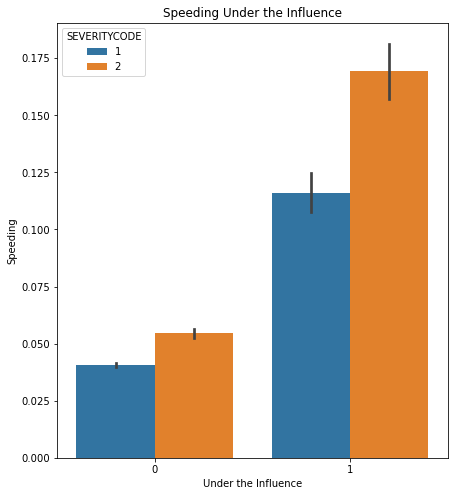

In [66]:
plt.figure(figsize=(7,8))
g = sns.barplot(x='UNDERINFL', y='SPEEDING', hue = 'SEVERITYCODE', data = df)
plt.title('Speeding Under the Influence')
plt.ylabel('Speeding')
plt.xlabel('Under the Influence')
#plt.show()
plt.savefig('un_sp_sev.jpg', bbox_inches = 'tight')

<Figure size 432x504 with 0 Axes>

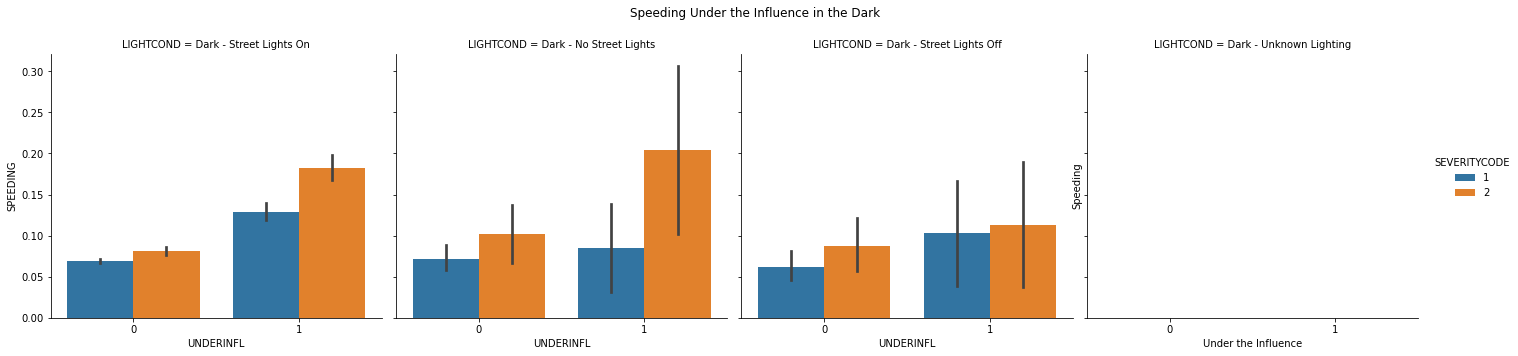

In [71]:
plt.figure(figsize=(6,7))
g = sns.catplot(x='UNDERINFL', y='SPEEDING', hue='SEVERITYCODE', col='LIGHTCOND', kind='bar', data = df[df['LIGHTCOND'].str.contains('Dark')==True])
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Speeding Under the Influence in the Dark')
plt.xlabel('Under the Influence')
plt.ylabel('Speeding')
#plt.show()
plt.savefig('un_sp_sev_lig.jpg', bbox_inches = 'tight')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


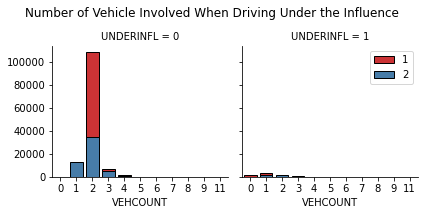

In [68]:
bins = np.linspace(df.VEHCOUNT.min(), df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df, col="UNDERINFL", hue='SEVERITYCODE', palette="Set1", col_wrap=2)
g.map(sns.countplot, 'VEHCOUNT', ec="k")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Number of Vehicle Involved When Driving Under the Influence')
g.axes[-1].legend()
#plt.show()
plt.savefig('un_sev_hist.jpg', bbox_inches = 'tight')

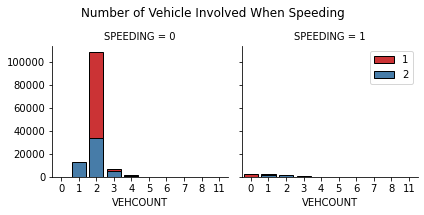

In [69]:
bins = np.linspace(df.VEHCOUNT.min(), df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(df, col="SPEEDING", hue='SEVERITYCODE', palette="Set1", col_wrap=2)
g.map(sns.countplot, 'VEHCOUNT', ec="k")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Number of Vehicle Involved When Speeding')
g.axes[-1].legend()
#plt.show()
plt.savefig('sp_sev_hist.jpg', bbox_inches = 'tight')

In [77]:
desc = df[['SEVERITYCODE', 'SEVERITYDESC', 'LOCATION', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']].describe().loc[['mean', 'std', 'min', 'max']].T

In [78]:
print(desc.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      mean &       std &  min &   max \\
\midrule
SEVERITYCODE &  1.301171 &  0.458768 &  1.0 &   2.0 \\
PERSONCOUNT  &  2.458978 &  1.354919 &  0.0 &  81.0 \\
VEHCOUNT     &  1.970209 &  0.557747 &  0.0 &  12.0 \\
UNDERINFL    &  0.048059 &  0.213891 &  0.0 &   1.0 \\
SPEEDING     &  0.049176 &  0.216235 &  0.0 &   1.0 \\
\bottomrule
\end{tabular}

